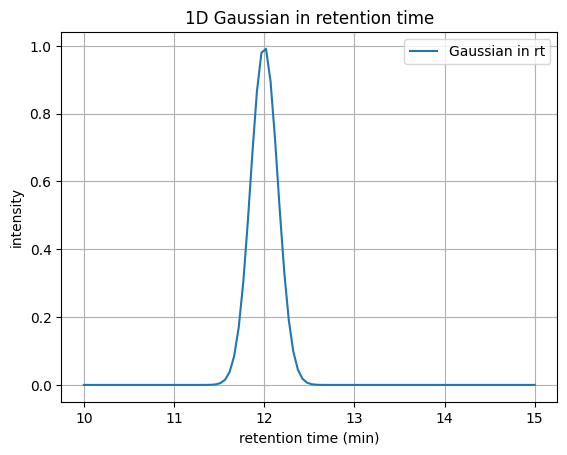

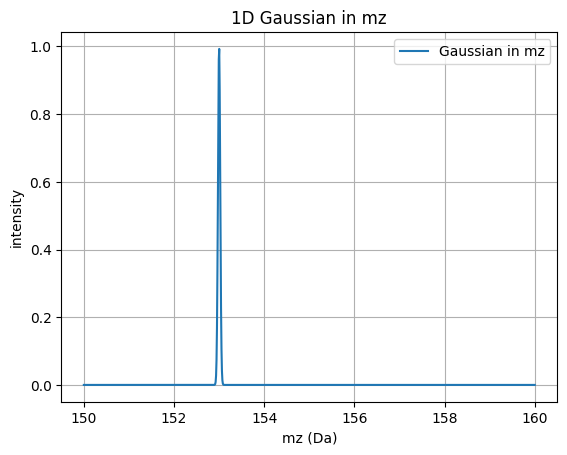

In [5]:
import numpy as np

import matplotlib.pyplot as plt

# Function to generate 1D Gaussian PDF
def gaussian_pdf(x_range, center, sigma, amplitude=1):
    return amplitude * np.exp(-0.5 * ((x_range - center) / sigma) ** 2)

""" def gaussian_pdf(x, y, center_x, center_y, sigma_x, sigma_y, amplitude=1):
    intensity = amplitude * np.exp(-0.5 * ((x - center_x) / sigma_x) ** 2)* np.exp(-0.5 * ((y - center_y) / sigma_y) ** 2)
    return intensity """

# Define the range

rt_range = np.linspace(10, 15, 100)
mz_range = np.linspace(150, 160, 1000)
peak_height = 25067

# Generate two Gaussians with different parameters
gaussian_rt = gaussian_pdf(rt_range, center=12, sigma=0.15, amplitude=1)
gaussian_mz = gaussian_pdf(mz_range, center=153, sigma=0.025, amplitude=1)

# Plot the Gaussians
plt.plot(rt_range, gaussian_rt, label='Gaussian in rt')
plt.title('1D Gaussian in retention time')
plt.xlabel('retention time (min)')
plt.ylabel('intensity')
plt.legend(loc='upper right')
plt.grid()
plt.show()

plt.plot(mz_range, gaussian_mz, label='Gaussian in mz')
plt.title('1D Gaussian in mz')
plt.xlabel('mz (Da)')
plt.ylabel('intensity')
plt.legend(loc='upper right')
plt.grid()
plt.show()

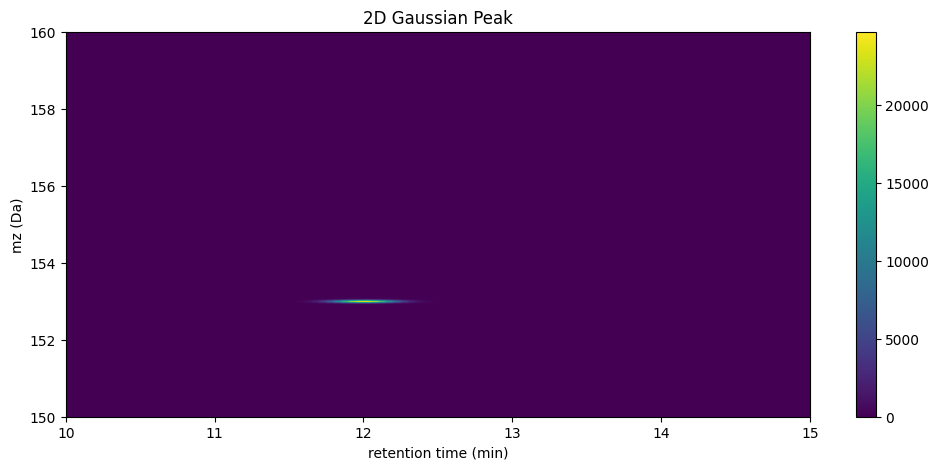

In [6]:
gauss_2d = peak_height * np.outer(gaussian_mz, gaussian_rt)  # y as rows, x as columns

""" # Normalize for visualization
gauss_2d /= gauss_2d.max()
 """
 
# Plot the 2D Gaussian
plt.figure(figsize=(12, 5))
plt.imshow(gauss_2d, extent=[rt_range[0], rt_range[-1], mz_range[-1], mz_range[0]],
           aspect='auto', cmap='viridis')
plt.title("2D Gaussian Peak")
plt.xlabel('retention time (min)')
plt.ylabel('mz (Da)')
plt.ylim(mz_range[0], mz_range[-1])     # Zoom on mass
plt.xlim(rt_range[0], rt_range[-1])
plt.colorbar()
plt.show()

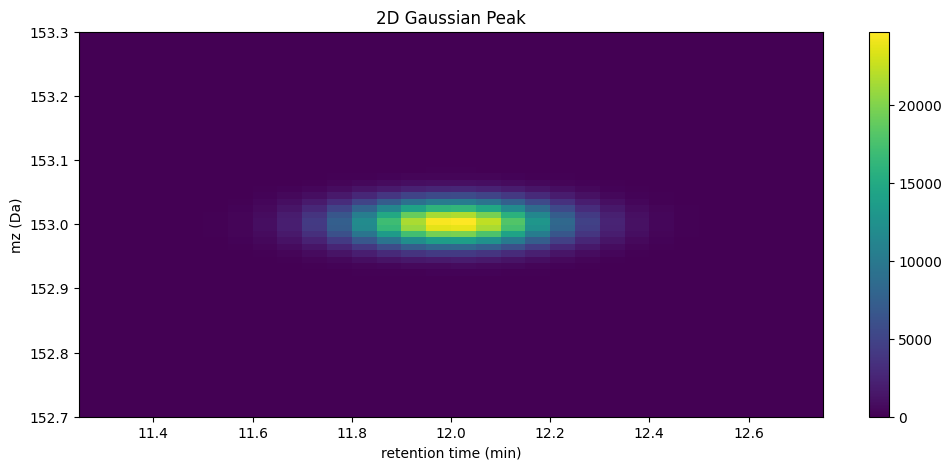

In [7]:
# zoom in on the peak
plt.figure(figsize=(12, 5))
plt.imshow(gauss_2d, extent=[rt_range[0], rt_range[-1], mz_range[-1], mz_range[0]],
           aspect='auto', cmap='viridis')
plt.ylabel('mz (Da)')
plt.xlabel('retention time (min)')
plt.title("2D Gaussian Peak")
plt.ylim(152.70, 153.30)     # Zoom on mass
plt.xlim(11.25, 12.75)
plt.colorbar()
plt.show()

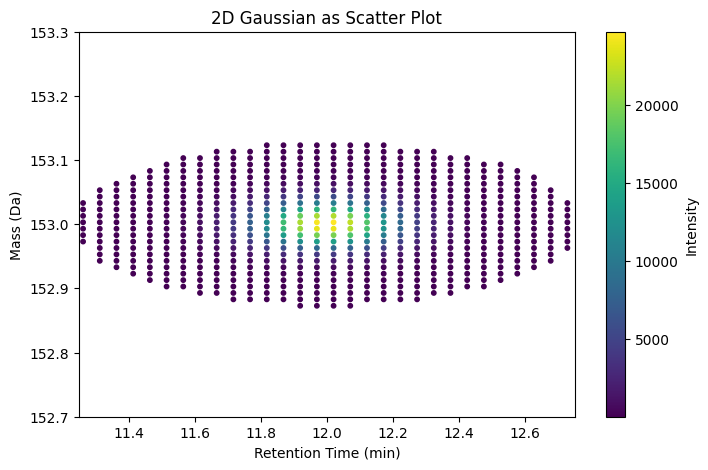

In [8]:
MASS, RT = np.meshgrid(rt_range, mz_range)

# Flatten all arrays for scatter plotting
x = MASS.flatten()
y = RT.flatten()
intensity = gauss_2d.flatten()

# Optional: mask low-intensity points to reduce clutter
mask = intensity > 0.05  # adjust as needed

# Scatter plot
plt.figure(figsize=(8, 5))
scatter = plt.scatter(x[mask], y[mask], c=intensity[mask], cmap='viridis', s=10)

plt.ylabel("Mass (Da)")
plt.xlabel("Retention Time (min)")
plt.title("2D Gaussian as Scatter Plot")
plt.colorbar(scatter, label="Intensity")
plt.ylim(152.70, 153.30)     # Zoom on mass
plt.xlim(11.25, 12.75)
plt.show()

list of gaussians I want to add with relevant (mew), irregular map (non uniform sampling)

take sampling data points around the mean in mz and retention time

add tails at the end


In [9]:
def generate_2d_gaussian(rt_range, mz_range, rt_center, mz_center, rt_sigma, mz_sigma, amplitude):
    rt_gauss = gaussian_pdf(rt_range, rt_center, rt_sigma)
    mz_gauss = gaussian_pdf(mz_range, mz_center, mz_sigma)
    return amplitude * np.outer(mz_gauss, rt_gauss)

In [10]:
def generate_multiple_peaks(rt_range, mz_range, peak_params):
    """
    peak_params: list of dicts, each with keys:
        rt_center, mz_center, rt_sigma, mz_sigma, amplitude
    """
    combined = np.zeros((len(mz_range), len(rt_range)))
    for params in peak_params:
        peak = generate_2d_gaussian(rt_range, mz_range, **params)
        combined += peak
    return combined


In [11]:
def plot_heatmap(gauss_2d, rt_range, mz_range, title="2D Gaussian", zoom=False):
    plt.figure(figsize=(12, 5))
    plt.imshow(gauss_2d, extent=[rt_range[0], rt_range[-1], mz_range[-1], mz_range[0]],
               aspect='auto', cmap='viridis')
    plt.colorbar(label='Intensity')
    plt.xlabel('Retention Time (min)')
    plt.ylabel('mz (Da)')
    plt.title(title)
    
    if zoom:
        plt.xlim(zoom.get('xlim', (rt_range[0], rt_range[-1])))
        plt.ylim(zoom.get('ylim', (mz_range[0], mz_range[-1])))
    
    plt.show()


In [12]:
def plot_scatter(gauss_2d, rt_range, mz_range, intensity_thresh=0.05, title="Scatter Plot", zoom=False):
    MASS, RT = np.meshgrid(rt_range, mz_range)
    x = MASS.flatten()
    y = RT.flatten()
    intensity = gauss_2d.flatten()
    
    mask = intensity > intensity_thresh
    plt.figure(figsize=(8, 5))
    scatter = plt.scatter(x[mask], y[mask], c=intensity[mask], cmap='viridis', s=10)
    
    plt.colorbar(scatter, label='Intensity')
    plt.xlabel('Retention Time (min)')
    plt.ylabel('mz (Da)')
    plt.title(title)

    if zoom:
        plt.xlim(zoom.get('xlim', (rt_range[0], rt_range[-1])))
        plt.ylim(zoom.get('ylim', (mz_range[0], mz_range[-1])))

    plt.show()


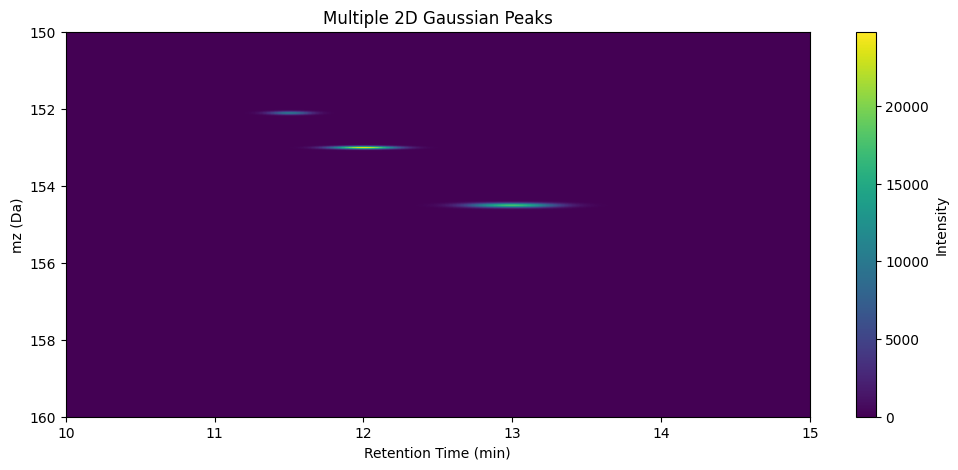

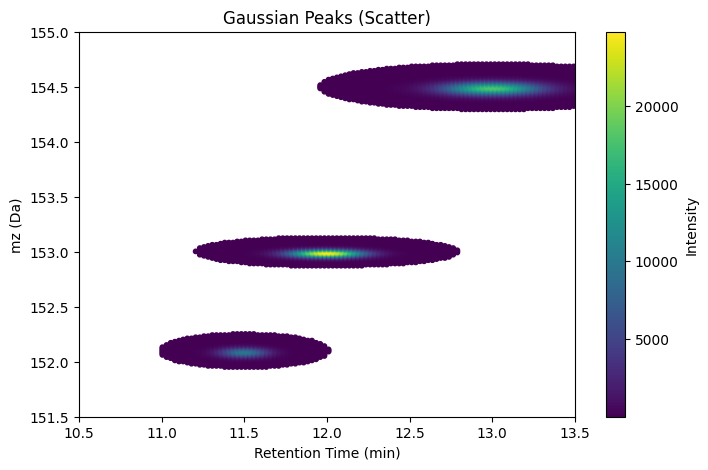

In [13]:
rt_range = np.linspace(10, 15, 200)
mz_range = np.linspace(150, 160, 1000)

# Define 10 peaks with varying centers/sigmas
peak_params = [
    {"rt_center": 11.5, "mz_center": 152.1, "rt_sigma": 0.1, "mz_sigma": 0.03, "amplitude": 10000},
    {"rt_center": 12.0, "mz_center": 153.0, "rt_sigma": 0.15, "mz_sigma": 0.025, "amplitude": 25000},
    {"rt_center": 13.0, "mz_center": 154.5, "rt_sigma": 0.2, "mz_sigma": 0.04, "amplitude": 18000},
    # Add 7 more with variations
]

gauss_2d = generate_multiple_peaks(rt_range, mz_range, peak_params)

plot_heatmap(gauss_2d, rt_range, mz_range, title="Multiple 2D Gaussian Peaks")
plot_scatter(gauss_2d, rt_range, mz_range, intensity_thresh=0.02, title="Gaussian Peaks (Scatter)",
             zoom={"xlim": (10.5, 13.5), "ylim": (151.5, 155)})


1. Create Non regular mesh
2. 